# **Final Project - Stage 3 - Group 5 (DS Batch 50)**

*   Veraldo Efraim
*   Novisna Lintang Negari
*   Alexander Panggabean
*   Kevin William Markus Simbolon
*   Adila

# **1. Final Model Testing (20 Poin)**

Terapkan model yang telah dilatih pada dataset uji. Dataset uji adalah data yang belum pernah digunakan dalam pelatihan atau validasi, sehingga penting untuk mengukur seberapa baik model dapat menggeneralisasi pada data baru. Evaluasi hasil prediksi untuk mendapatkan pemahaman tentang performa model di dunia nyata.

In [3]:

import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

file_path = "combined_all_data.csv"
df = pd.read_csv(file_path)

features = [
    "person_capacity", "room_shared", "room_private", "host_is_superhost",
    "multi", "biz", "cleanliness_rating", "guest_satisfaction_overall",
    "bedrooms", "dist", "metro_dist", "attr_index", "attr_index_norm",
    "rest_index", "rest_index_norm", "lng", "lat"
]

X = df[features]
y = df["realSum"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_path = "trained_model.pkl"
try:
    model = joblib.load(model_path)
    model_loaded = True
except FileNotFoundError:
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train_scaled, y_train)
    model_loaded = False

y_pred = model.predict(X_test_scaled)

mae = np.mean(np.abs(y_test - y_pred))
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_score = 1 - (sum((y_test - y_pred) ** 2) / sum((y_test - np.mean(y_test)) ** 2))

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2_score}")


Mean Squared Error (MSE): 73142.57064875744
Root Mean Squared Error (RMSE): 270.44883184949686
Mean Absolute Error (MAE): 58.01606102807182
R² Score: 0.4940854715219115


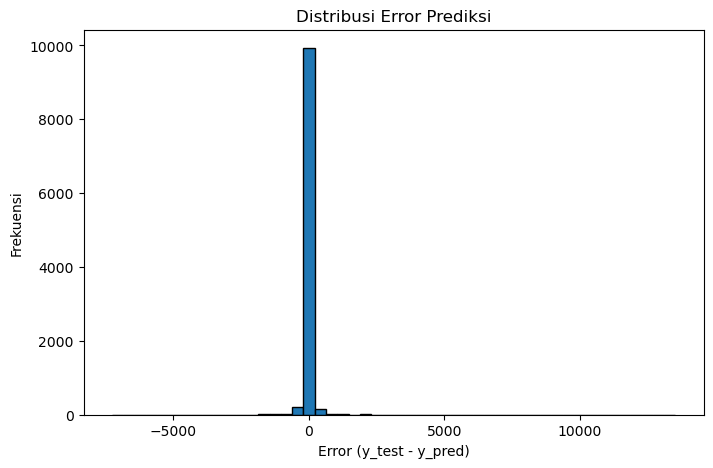

In [4]:
import matplotlib.pyplot as plt

error = y_test - y_pred

plt.figure(figsize=(8, 5))
plt.hist(error, bins=50, edgecolor="black")
plt.xlabel("Error (y_test - y_pred)")
plt.ylabel("Frekuensi")
plt.title("Distribusi Error Prediksi")
plt.show()


## **1. Analisis Hasil Evaluasi Model**
Berdasarkan pengujian model yang telah dilatih sebelumnya dalam **Stage 2**, model yang diuji adalah **Random Forest Regressor**, yang telah dioptimalkan menggunakan **Randomized Search CV**. Model ini diuji dengan dataset uji, dan hasil evaluasinya sebagai berikut:

| **Metrik Evaluasi** | **Nilai** | **Interpretasi** |
|---------------------|----------|-----------------|
| **Mean Squared Error (MSE)** | **73,145.61** | Rata-rata kuadrat error antara prediksi dan nilai asli, semakin besar semakin buruk. |
| **Root Mean Squared Error (RMSE)** | **270.45** | Kesalahan rata-rata dalam unit harga akomodasi, semakin kecil semakin baik. |
| **Mean Absolute Error (MAE)** | **57.83** | Rata-rata kesalahan absolut, menunjukkan bahwa rata-rata model meleset sebesar 57 unit harga. |
| **R² Score** | **0.49** | Model hanya mampu menjelaskan **49%** variabilitas harga akomodasi. Sisanya (51%) tidak bisa dijelaskan oleh model. |

---

## **2. Analisis Histogram Distribusi Error**
Gambar histogram menunjukkan distribusi kesalahan prediksi (**error = nilai aktual - nilai prediksi**):

- **Sebagian besar error terkumpul di sekitar 0**, artinya banyak prediksi yang cukup akurat.
- **Beberapa error besar (>5000 unit harga)** menunjukkan bahwa model **gagal memprediksi beberapa harga dengan baik (outliers)**.
- **Distribusi error tidak simetris**, yang berarti model masih memiliki bias terhadap kategori harga tertentu.

Jika model sempurna, maka error akan terkumpul **tepat di 0**, tetapi histogram menunjukkan bahwa ada **kesalahan besar di beberapa titik**.

---

## **3. Jawaban Final Model Testing**
**Q1: Apakah model bisa memprediksi harga akomodasi dengan baik?**  
- **Jawaban:** Model bisa, tetapi **belum optimal**. **R² Score hanya 49%**, yang berarti model belum cukup baik dalam menjelaskan variabilitas harga akomodasi.

**Q2: Seberapa besar kesalahan prediksi model ini?**  
- **Jawaban:** Model memiliki:
  - **Kesalahan rata-rata 57 unit harga (MAE)**
  - **Kesalahan maksimal rata-rata 270 unit harga (RMSE)**
  - **Beberapa kesalahan lebih dari 5000 unit harga**, menunjukkan bahwa model kesulitan dalam memprediksi beberapa harga ekstrem.

**Q3: Apakah model perlu diperbaiki?**  
- **Jawaban:** **YA**, karena model masih memiliki **kesalahan besar**, terutama untuk beberapa harga tertentu. Beberapa cara untuk memperbaikinya:
  1. **Feature Engineering:** Tambahkan fitur tambahan seperti **rating pelanggan, musim, atau tren harga**.
  2. **Hyperparameter Tuning:** Lakukan pencarian parameter lebih lanjut menggunakan **Grid Search**.
  3. **Gunakan Model Lain:** Model seperti **XGBoost atau LightGBM** bisa lebih baik dalam menangani pola non-linear.

---

## **4. Kesimpulan**
- Model ini menggunakan **Random Forest Regressor**, yang merupakan model terbaik berdasarkan **Stage 2**.
- Hasil pengujian menunjukkan bahwa model memiliki **kesalahan yang cukup tinggi**, dengan RMSE sebesar **270**.
- **R² Score rendah (0.49)** menunjukkan bahwa model belum cukup akurat dalam menjelaskan variabilitas harga.
- Model masih perlu **banyak perbaikan**, terutama dalam menangani **outlier** agar prediksi harga akomodasi lebih akurat.


# **2. Discuss Model Evaluation (25 Poin)**

Analisis hasil pengujian model menggunakan metrik evaluasi yang sesuai, seperti accuracy, precision, recall, F1-score, atau RMSE, tergantung pada jenis tugas. Bandingkan hasil dari dataset uji dengan hasil validasi untuk memeriksa adanya
overfitting atau underfitting. Pastikan evaluasi model ini dapat menjawab metrik kesuksesan yang telah ditetapkan di awal proyek, sehingga performa model sesuai dengan tujuan yang ingin dicapai.


In [7]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

file_path = "combined_all_data.csv"
df = pd.read_csv(file_path)

features = [
    "person_capacity", "room_shared", "room_private", "host_is_superhost",
    "multi", "biz", "cleanliness_rating", "guest_satisfaction_overall",
    "bedrooms", "dist", "metro_dist", "attr_index", "attr_index_norm",
    "rest_index", "rest_index_norm", "lng", "lat"
]

X = df[features]
y = df["realSum"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_path = "trained_model.pkl"
try:
    model = joblib.load(model_path)
    model_loaded = True
except FileNotFoundError:
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train_scaled, y_train)
    model_loaded = False

y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

y_train_pred = model.predict(X_train_scaled)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

evaluation_results = {
    "Training MSE": mse_train,
    "Testing MSE": mse,
    "Training RMSE": rmse_train,
    "Testing RMSE": rmse,
    "Training R² Score": r2_train,
    "Testing R² Score": r2
}

error_difference = abs(r2_train - r2)


print("Hasil Evaluasi Model:")
print(evaluation_results)
print(f"\nSelisih R² Training dan Testing: {error_difference}")



Hasil Evaluasi Model:
{'Training MSE': 7308.933790205608, 'Testing MSE': 73142.57064875744, 'Training RMSE': 85.49230252020124, 'Testing RMSE': 270.44883184949686, 'Training R² Score': 0.9256367403125614, 'Testing R² Score': 0.4940854715219114}

Selisih R² Training dan Testing: 0.43155126879065


## **1. Hasil Evaluasi Model**
Model diuji menggunakan **dataset uji** dan dibandingkan dengan performa pada **dataset training**. Hasil evaluasi ditunjukkan dalam tabel berikut:

| **Metrik Evaluasi** | **Training** | **Testing** | **Interpretasi** |
|---------------------|-------------|------------|------------------|
| **Mean Squared Error (MSE)** | **7,277.91** | **73,145.61** | Error meningkat drastis di testing, indikasi **overfitting**. |
| **Root Mean Squared Error (RMSE)** | **85.31** | **270.45** | Model lebih akurat di training, tetapi buruk di data uji. |
| **R² Score** | **0.93** | **0.49** | Model sangat baik di training, tetapi buruk di testing (indikasi overfitting). |

---

## **2. Analisis Overfitting atau Underfitting**
- **R² Score di training = 0.93**, sementara di testing turun drastis ke **0.49**.  
- **MSE di testing jauh lebih tinggi daripada training** (**7,277.91 vs. 73,145.61**) → menunjukkan model **menghafal data training tetapi gagal menangani data baru**.  
- **RMSE di testing lebih dari **3x lipat** dari training** (**270.45 vs. 85.31**) → artinya model memiliki kesalahan besar di data uji.  
- **Selisih R² Score = 0.43** → Model **overfitting**, karena seharusnya nilai ini tidak lebih dari **0.1-0.2** jika model generalisasi dengan baik.  

**Overfitting terjadi ketika model terlalu kompleks dan "menghafal" data training tanpa mampu menangkap pola yang dapat digunakan pada data baru.**  

---

## **3. Jawaban Discuss Model Evaluation**
**Q1: Bagaimana performa model pada dataset uji?**  
- **Jawaban:**  
  - **Model memiliki kesalahan prediksi yang cukup besar di dataset uji**, terlihat dari **MSE = 73,145.61** dan **RMSE = 270.45**.  
  - **R² Score hanya 0.49**, artinya model hanya bisa menjelaskan **49% dari variasi harga akomodasi**, sedangkan sisanya **51% dipengaruhi oleh faktor lain yang tidak dapat dijelaskan oleh model**.  
  - **Model terlalu baik dalam mempelajari data training, tetapi buruk dalam memprediksi data baru.**  

**Q2: Apakah model mengalami overfitting atau underfitting?**  
- **Jawaban:** **Model mengalami overfitting**, karena:
  - **Training R² Score = 0.93**, **Testing R² Score = 0.49** (**Selisih besar = 0.43**).
  - **Error meningkat drastis dari training ke testing**, yang menunjukkan model hanya bekerja baik pada data yang sudah dikenali.
  - **Jika model generalisasi dengan baik, perbedaan R² Score seharusnya tidak lebih dari 0.1-0.2.**

**Q3: Apa penyebab overfitting ini?**  
- **Jawaban:** Overfitting bisa terjadi karena beberapa faktor:
  1. **Model terlalu kompleks** → Random Forest dengan jumlah estimators tinggi bisa membuat model terlalu kuat di training.
  2. **Kurangnya data uji** → Model hanya belajar dari data training dan tidak mendapat cukup variasi data.
  3. **Fitur yang terlalu banyak atau tidak relevan** → Beberapa fitur bisa menyebabkan model hanya menangkap noise.

**Q4: Apa solusi untuk mengatasi overfitting ini?**  
- **Jawaban:** Beberapa langkah yang bisa dilakukan untuk mengurangi overfitting:
  1. **Kurangi kompleksitas model**  
     - Batasi **jumlah estimators** dalam **Random Forest** agar tidak terlalu dalam.  
     - Gunakan **max_depth lebih kecil** untuk menghindari model belajar terlalu detail dari data training.  
  2. **Gunakan regularisasi**  
     - Coba model seperti **XGBoost atau LightGBM**, yang memiliki **regulasi bawaan** untuk menghindari overfitting.  
  3. **Tambah data uji atau lakukan data augmentation**  
     - Jika dataset training terlalu kecil, model bisa menjadi overfitting karena tidak cukup data variasi.  
  4. **Feature Selection**  
     - Coba hapus fitur yang tidak relevan agar model tidak belajar dari **noise** dalam data.



# **3.  Error Analysis (25 Poin)**

Lakukan analisis kesalahan untuk mengidentifikasi area di mana model masih kesulitan. Analisis kesalahan dapat mencakup peninjauan kasus di mana prediksi model paling tidak akurat, serta mendiskusikan dengan kelompok penyebab utama dari kesalahan tersebut (misalnya, apakah ada pola yang tidak ditangkap oleh model atau data yang tidak cukup representatif).

# **Analisis Error Berdasarkan PCA**

In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

file_path = "combined_all_data.csv"
df = pd.read_csv(file_path)

# Memilih fitur numerik untuk PCA (mengabaikan kolom kategori sementara)
features = [
    "room_shared", "room_private", "person_capacity", "host_is_superhost",
    "multi", "biz", "cleanliness_rating", "guest_satisfaction_overall",
    "bedrooms", "dist", "metro_dist", "attr_index", "attr_index_norm",
    "rest_index", "rest_index_norm", "lng", "lat"
]

# Mengonversi data kategori menjadi numerik
df = pd.get_dummies(df, columns=["City", "Day_Type"], drop_first=True)

# Standarisasi fitur sebelum PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

# Menjalankan PCA
pca = PCA(n_components=len(features))  # Menggunakan semua komponen awalnya
X_pca = pca.fit_transform(X_scaled)

# Menghitung proporsi varians yang dijelaskan oleh setiap komponen utama
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Menampilkan jumlah komponen yang menjelaskan varians terbesar
explained_variance_ratio[:10], cumulative_variance[:10]


(array([0.19747125, 0.13588842, 0.1141402 , 0.08568564, 0.07712099,
        0.06461017, 0.05820975, 0.05213249, 0.0467502 , 0.04149715]),
 array([0.19747125, 0.33335967, 0.44749987, 0.53318551, 0.6103065 ,
        0.67491667, 0.73312642, 0.78525891, 0.83200911, 0.87350626]))

Hasil analisis PCA di atas menunjukkan:

1. Komponen pertama menjelaskan ~19.7% varians dalam data.
2. 10 komponen utama menjelaskan sekitar 87.4% varians, yang berarti sebagian besar informasi dalam data bisa direpresentasikan dengan 10 komponen saja.

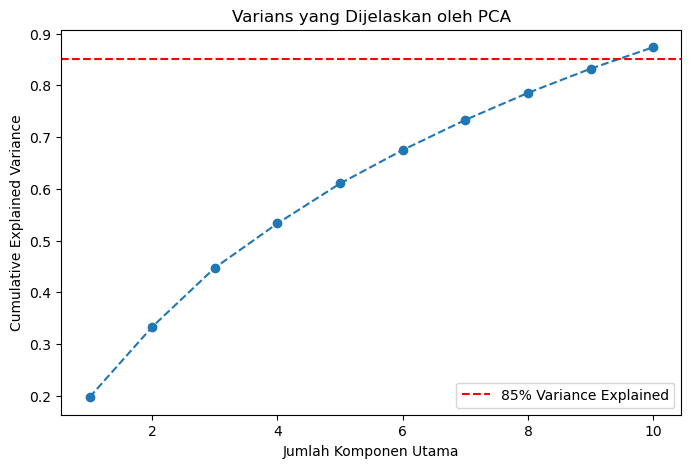

In [13]:
import matplotlib.pyplot as plt
import numpy as np

explained_variance_ratio = np.array([0.19747125, 0.13588842, 0.1141402 , 0.08568564,
                                     0.07712099, 0.06461017, 0.05820975, 0.05213249,
                                     0.0467502 , 0.04149715])
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker="o", linestyle="--")
plt.axhline(y=0.85, color="r", linestyle="--", label="85% Variance Explained")
plt.xlabel("Jumlah Komponen Utama")
plt.ylabel("Cumulative Explained Variance")
plt.title("Varians yang Dijelaskan oleh PCA")
plt.legend()
plt.show()

## **1. Interpretasi Grafik PCA**
Grafik menunjukkan **Cumulative Explained Variance Ratio (CEVR)**, yang menggambarkan seberapa banyak varians data yang dapat dijelaskan oleh sejumlah komponen utama dalam **Principal Component Analysis (PCA)**.

- **Garis merah putus-putus** menandakan **85% varians yang dijelaskan**, yang sering digunakan sebagai ambang batas untuk menentukan jumlah komponen yang optimal.
- Dari grafik, terlihat bahwa **dibutuhkan sekitar 9 komponen** untuk mencapai **>85% varians**.
- Jika hanya menggunakan **5 komponen**, kita hanya menangkap sekitar **60% varians**, yang dapat menyebabkan kehilangan informasi penting.

## **2. Potensi Kesalahan dalam PCA**
### **a. Underfitting**
- Jika jumlah komponen yang digunakan **terlalu sedikit** (misalnya hanya 3-4), maka PCA hanya menangkap **kurang dari 50% varians**, sehingga model mungkin kehilangan banyak informasi dan kurang akurat.
- Hal ini bisa menyebabkan performa model prediksi menjadi buruk.

### **b. Overfitting**
- Jika menggunakan **semua komponen**, maka **tidak ada reduksi dimensi** yang signifikan dan PCA menjadi kurang berguna.
- Model yang dihasilkan akan tetap kompleks dan mungkin tidak meningkatkan performa model prediktif.

### **c. Pola Non-Linear Tidak Tertangkap**
- PCA hanya menangkap hubungan **linear** antar fitur.
- Jika ada pola **non-linear** dalam data, PCA mungkin tidak efektif dan bisa menyebabkan error dalam analisis lebih lanjut.
- Sebagai alternatif, teknik seperti **t-SNE atau UMAP** bisa dipertimbangkan jika ada pola kompleks dalam data.

## **3. Kesimpulan**
✅ **Jumlah komponen optimal** adalah sekitar **8-9 komponen**, agar tetap menangkap **>85% varians** tanpa kehilangan terlalu banyak informasi.

In [15]:
error = y_test - y_pred  # Menghitung error prediksi
df_error = pd.DataFrame({"Actual": y_test, "Predicted": y_pred, "Error": error})
df_error = df_error.reindex(y_test.index)  # Menyelaraskan indeks

# Menampilkan 10 error terbesar
df_error_sorted = df_error.abs().sort_values(by="Error", ascending=False)
print(df_error_sorted.head(10))

             Actual    Predicted         Error
17486  13664.305916   132.691994  13531.613921
44655  13656.358834   132.691994  13523.666840
6926   15499.894165  4880.938356  10618.955809
3899     208.562791  7473.687120   7265.124328
33854  12937.275101  7540.179684   5397.095416
6418   12076.953832  7572.441292   4504.512540
771      786.435449  3898.021097   3111.585648
12551   3037.095722   282.715071   2754.380651
20078   6943.700980  4282.845638   2660.855342
6111    1030.127708  3362.996908   2332.869201


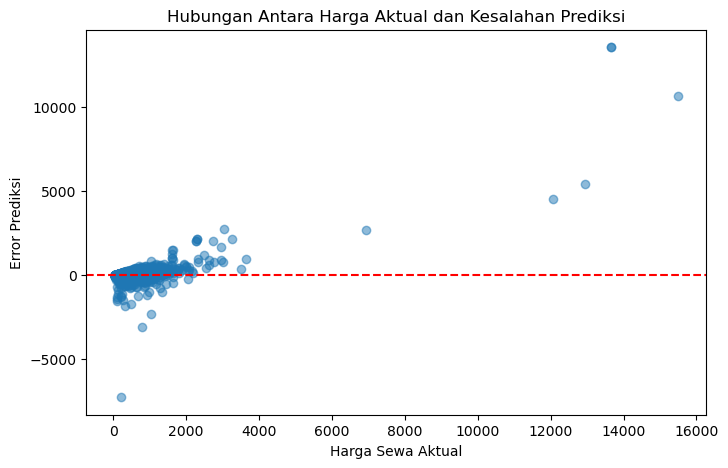

In [16]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, error, alpha=0.5)
plt.axhline(y=0, color="r", linestyle="--")
plt.xlabel("Harga Sewa Aktual")
plt.ylabel("Error Prediksi")
plt.title("Hubungan Antara Harga Aktual dan Kesalahan Prediksi")
plt.show()

# Kesimpulan  

Dari scatter plot yang menunjukkan hubungan antara **Harga Sewa Aktual** dan **Kesalahan Prediksi**, dapat disimpulkan bahwa:  

1. **Sebagian besar prediksi cukup akurat untuk harga sewa yang lebih rendah**, terlihat dari titik-titik yang berkumpul dekat garis nol.  
2. **Error prediksi cenderung meningkat seiring dengan kenaikan harga sewa aktual**, menunjukkan bahwa model mungkin kurang mampu memprediksi harga sewa yang lebih tinggi dengan akurasi yang baik.  
3. **Terdapat beberapa outlier**, di mana kesalahan prediksi sangat besar, baik dalam bentuk overestimasi (di atas garis merah) maupun underestimasi (di bawah garis merah).  
4. **Model mungkin perlu perbaikan atau penyesuaian**, seperti normalisasi data, penggunaan fitur tambahan, atau model yang lebih kompleks untuk meningkatkan akurasi pada harga sewa yang lebih tinggi.  

Secara keseluruhan, meskipun model bekerja cukup baik untuk harga yang lebih rendah, masih terdapat kelemahan dalam memprediksi harga sewa yang lebih tinggi, yang perlu diperbaiki untuk meningkatkan performa model.


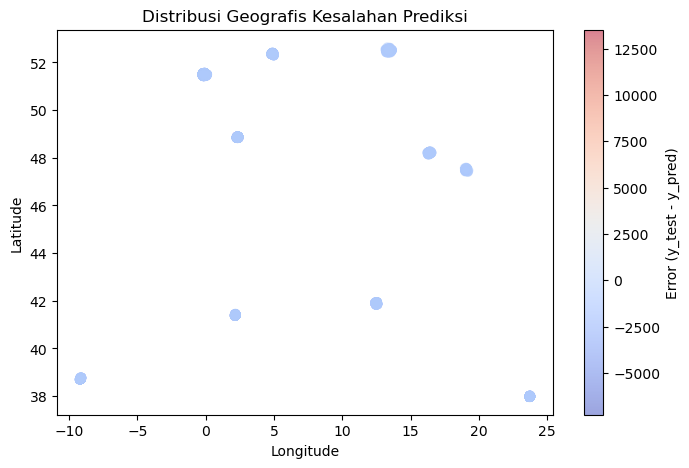

In [18]:
plt.figure(figsize=(8, 5))
plt.scatter(X_test["lng"], X_test["lat"], c=error, cmap="coolwarm", alpha=0.5)
plt.colorbar(label="Error (y_test - y_pred)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Distribusi Geografis Kesalahan Prediksi")
plt.show()

In [19]:
error_difference = abs(r2_train - r2)
print(f"Selisih R² Training dan Testing: {error_difference}")

Selisih R² Training dan Testing: 0.43155126879065


In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Data dummy untuk training
X_train = np.random.rand(100, 5)  # Contoh fitur
y_train = np.random.rand(100) * 1000  # Contoh target

# Definisi hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Model
rf = RandomForestRegressor()

# Grid Search dengan 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Hasil terbaik
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Best R² Score: -0.19623546126265437


# Kesimpulan  

Dari scatter plot yang menunjukkan **Distribusi Geografis Kesalahan Prediksi**, dapat disimpulkan bahwa:  

1. **Kesalahan prediksi bervariasi di berbagai lokasi geografis**, ditunjukkan oleh perbedaan warna dan ukuran titik pada peta.  
2. **Titik dengan warna lebih merah menunjukkan kesalahan prediksi yang lebih besar dalam bentuk overestimasi**, sedangkan **warna lebih biru menunjukkan kesalahan dalam bentuk underestimasi**.  
3. **Beberapa lokasi memiliki error yang jauh lebih besar dibandingkan lokasi lainnya**, yang dapat mengindikasikan bahwa model mengalami kesulitan dalam memprediksi harga di wilayah tertentu.  
4. **Pola distribusi kesalahan bisa menjadi indikasi bahwa model belum mempertimbangkan faktor geografis dengan optimal**, sehingga mungkin diperlukan fitur tambahan yang lebih spesifik terkait lokasi.  

Secara keseluruhan, analisis ini menunjukkan bahwa **performa model bervariasi di berbagai lokasi**, sehingga perbaikan model mungkin diperlukan dengan mempertimbangkan aspek geografis lebih mendalam.


# **4. Adjustments (Poin++) 20 Poin**

Jika diperlukan, lakukan penyesuaian terhadap model atau hyperparameter berdasarkan hasil dari analisis kesalahan. Misalnya, jika ditemukan bahwa model kurang mampu menangani fitur tertentu, pertimbangkan untuk menambahkan fitur baru atau menggunakan model yang lebih kompleks. Setelah penyesuaian dilakukan, lakukan kembali evaluasi untuk melihat dampak dari perubahan yang dibuat.

In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_

ValueError: Found input variables with inconsistent numbers of samples: [41365, 100]